In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from functools import partial
from scikeras.wrappers import KerasClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix, f1_score
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['axes.labelsize'] = 15

In [2]:
dt = load_digits()
data = pd.DataFrame(dt.data, columns = dt.feature_names)
data['target'] = dt.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [3]:
data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


The dataset is clean so won't be analyzed any further.

In [4]:
data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.25 )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#Neural Network
def mlp():
    RegularizedDense = partial(keras.layers.Dense,
                               activation="selu",
                               kernel_initializer="lecun_normal",
                               kernel_regularizer=keras.regularizers.l2(0.01)
                              )

    mlp = keras.models.Sequential([
        keras.layers.InputLayer(input_shape = [X_train.shape[1]]),
        RegularizedDense(100),
        RegularizedDense(120),
        RegularizedDense(80),
        keras.layers.Dense(10, activation = 'softmax')])

    mlp.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
    
    return mlp

callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=30)

In [6]:
cv = StratifiedKFold(n_splits = 5)
mlp_wrap = KerasClassifier(mlp(), epochs = 100, callbacks = [callback], batch_size = 32)
scores = cross_val_score(mlp_wrap, X_train_scaled, y_train, cv=cv, n_jobs=-1)

INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpku95cz5z\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpf_a68jju\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp8u5t89vl\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpjubr564q\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpd7hpqord\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmplxqvortw\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpaf6p2u4k\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmprjycw9hd\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxbcrltx0\assets
INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpws4nnp9u\assets


In [7]:
scores.mean()

0.9561944100234063

In [8]:
mlp_wrap = KerasClassifier(mlp(), epochs = 100, batch_size = 32, verbose=0, callbacks = [callback])
mlp_wrap.fit(X_train_scaled, y_train)
mlp_wrap.score(X_test_scaled, y_test)

0.9577777777777777

Text(0.5, -0.9997599999999984, 'Predicted')

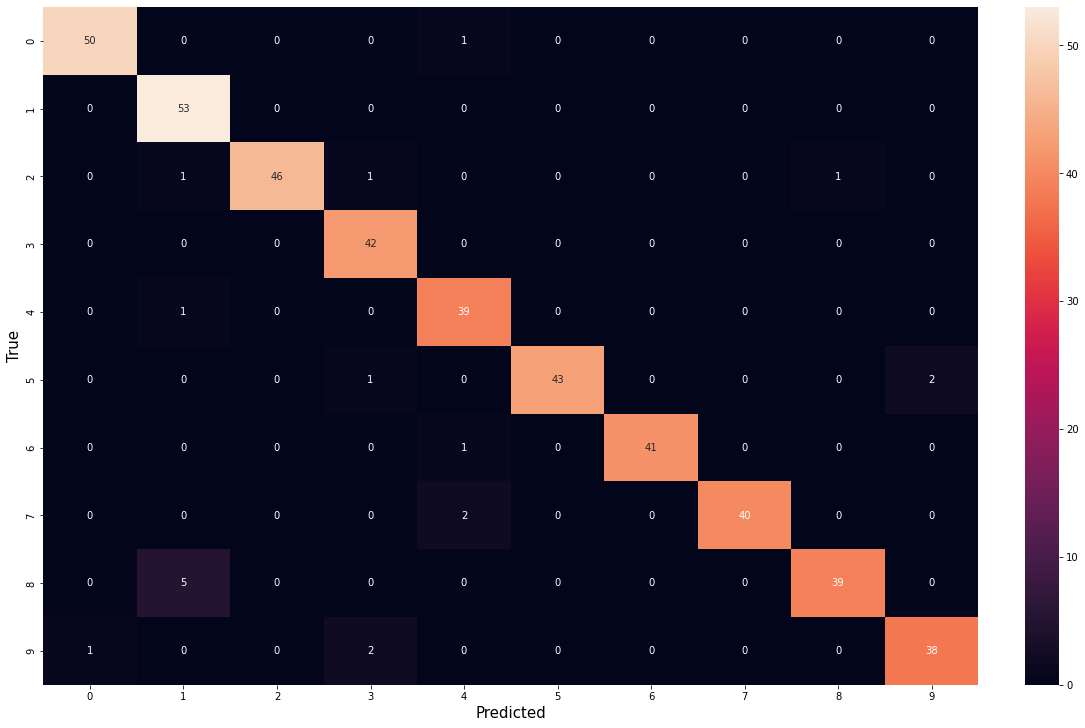

In [9]:
mlp_predictions = mlp_wrap.predict(X_test_scaled)
mlp_cm = confusion_matrix(y_test, mlp_predictions)
sns.heatmap(mlp_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')

In [10]:
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.88      1.00      0.94        53
           2       1.00      0.94      0.97        49
           3       0.91      1.00      0.95        42
           4       0.91      0.97      0.94        40
           5       1.00      0.93      0.97        46
           6       1.00      0.98      0.99        42
           7       1.00      0.95      0.98        42
           8       0.97      0.89      0.93        44
           9       0.95      0.93      0.94        41

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



Let's try with a convolutional neural network

In [11]:
#Convolutional neural network

def cnn():
    
    DefaultConv2D = partial(keras.layers.Conv2D,
                            kernel_size=3,
                            activation='elu',
                            padding="SAME")
    
    cnn = keras.models.Sequential([
        DefaultConv2D(filters=20, kernel_size=4, input_shape=[X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1]),
        keras.layers.MaxPooling2D(pool_size=2),
        DefaultConv2D(filters=40),
        DefaultConv2D(filters=40),
        keras.layers.MaxPooling2D(pool_size=2),
        DefaultConv2D(filters=80),
        DefaultConv2D(filters=80),
        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(units=40, activation='elu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=20, activation='elu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax'),
    ])

    cnn.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
    
    return cnn

In [12]:
#reshape data
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 8, 8))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 8, 8))

In [13]:
cv = StratifiedKFold(n_splits = 5)
cnn_wrap = KerasClassifier(cnn(), epochs = 100, callbacks = [callback], batch_size = 32)
scores = cross_val_score(cnn_wrap, X_train_reshaped, y_train, cv=cv, n_jobs=-1)

INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp74bk_kkd\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp74bk_kkd\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmppymkqh07\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmppymkqh07\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpc57m_w_i\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpc57m_w_i\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpj8d6lcfr\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpj8d6lcfr\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpjaewylfm\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpjaewylfm\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmppsle9vwo\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmppsle9vwo\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp2iwyo6g4\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp2iwyo6g4\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmphawhx721\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmphawhx721\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpcjc4fcgd\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpcjc4fcgd\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxps03f67\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpxps03f67\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpq97hwuj8\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpq97hwuj8\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpznynbc35\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpznynbc35\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpu9tyyzyz\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpu9tyyzyz\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpk8u2dtr0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpk8u2dtr0\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpjrpwkaju\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpjrpwkaju\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpo81a2m7t\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpo81a2m7t\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdtf8jf4s\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpdtf8jf4s\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpf2544_14\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpf2544_14\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp9a75k3ev\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmp9a75k3ev\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpcc0oxzbl\assets


INFO:tensorflow:Assets written to: C:\Users\ggiam\AppData\Local\Temp\tmpcc0oxzbl\assets


In [14]:
scores.mean()

0.9792096929643399

In [15]:
cnn_wrap = KerasClassifier(cnn(), epochs = 100, batch_size = 32, verbose=1)
cnn_wrap.fit(X_train_reshaped, y_train)
cnn_wrap.score(X_test_reshaped, y_test)

Epoch 1/100
43/43 [==============================] - 2s 5ms/step - loss: 1.7925 - accuracy: 0.3764
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 0.9806 - accuracy: 0.6756
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.7021 - accuracy: 0.7624
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5252 - accuracy: 0.8270
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4719 - accuracy: 0.8448
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.3915 - accuracy: 0.8753
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.9035
Epoch 8/100
43/43 [==============================] - 0s 5ms/step - loss: 0.3072 - accuracy: 0.9005
Epoch 9/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2598 - accuracy: 0.9109
Epoch 10/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9250
Epoch 11/

0.9933333333333333

15/15 [==============================] - 0s 2ms/step


Text(0.5, -0.9997599999999984, 'Predicted')

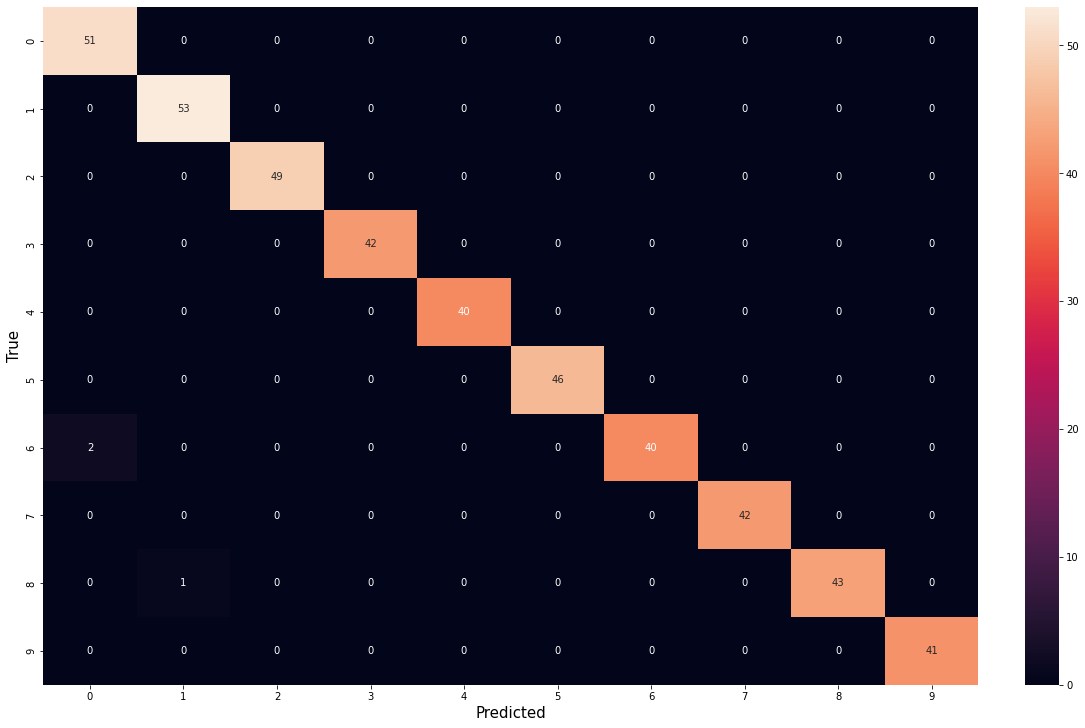

In [16]:
cnn_predictions = cnn_wrap.predict(X_test_reshaped)
cnn_cm = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(cnn_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')

In [17]:
print(classification_report(y_test, cnn_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        46
           6       1.00      0.95      0.98        42
           7       1.00      1.00      1.00        42
           8       1.00      0.98      0.99        44
           9       1.00      1.00      1.00        41

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



Compared to the mlp the cnn's predictions are more accurate, there are less missclassification.

Conclusion: CNN performs slightly better than MLP on this dataset.
<br> 
This was expected due to the nature of the problem (image classification)